In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from datetime import datetime,date
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import scipy.stats as ss

%matplotlib inline

In [3]:
cust_avgspend= pd.read_csv('AW_AveMonthSpend.csv')
cust_bikebuy= pd.read_csv('AW_BikeBuyer.csv')
cust_report= pd.read_csv('AdvWorksCusts.csv')
cust_report.head(20)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771
5,11005,NaN,Julio,NaN,Ruiz,NaN,7305 Humphrey Drive,NaN,East Brisbane,Queensland,...,1965-08-05,Bachelors,Professional,M,S,1,1,0,0,103199
6,11006,NaN,Janet,G,Alvarez,NaN,2612 Berry Dr,NaN,Matraville,New South Wales,...,1965-12-06,Bachelors,Professional,F,S,1,1,0,0,84756
7,11007,NaN,Marco,NaN,Mehta,NaN,942 Brook Street,NaN,Warrnambool,Victoria,...,1964-05-09,Bachelors,Professional,M,M,1,2,3,3,109759
8,11008,NaN,Rob,NaN,Verhoff,NaN,624 Peabody Road,NaN,Bendigo,Victoria,...,1964-07-07,Bachelors,Professional,F,S,1,3,4,4,88005
9,11009,NaN,Shannon,C,Carlson,NaN,3839 Northgate Road,NaN,Hervey Bay,Queensland,...,1964-04-01,Bachelors,Professional,M,S,0,1,0,0,106399


In [4]:
cust_report.columns = [str.replace('-', '_') for str in cust_report.columns]

In [5]:
cust_report["AveMonthSpend"]= cust_avgspend["AveMonthSpend"]
cust_report["BikeBuyer"]= cust_bikebuy["BikeBuyer"]

In [6]:
cust_report.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object

In [7]:
(cust_report.astype(np.object) =='').any()

CustomerID              False
Title                   False
FirstName               False
MiddleName              False
LastName                False
Suffix                  False
AddressLine1            False
AddressLine2            False
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
AveMonthSpend           False
BikeBuyer               False
dtype: bool

In [8]:
length1 = len(cust_report)
cust_report.drop_duplicates(keep ='last' , inplace = True)
length2 = len(cust_report) 
print(length1, length2)

16519 16421


In [9]:
cust_report.drop(['Title','MiddleName','Suffix','AddressLine2','PhoneNumber','FirstName','LastName'], axis=1)

,CustomerID,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89,0
1,11001,2243 W St.,Seaford,Victoria,Australia,3198,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117,1
2,11002,5844 Linden Land,Hobart,Tasmania,Australia,7001,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123,0
3,11003,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50,0
4,11004,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16514,13121,7259 Birchwood,Melton,Victoria,Australia,3337,1965-03-22,Bachelors,Professional,F,M,1,4,5,5,101542,101,0
16515,26100,7345 Kenwal Rd.,Shawnee,British Columbia,Canada,V8Z 4N5,1936-04-02,Partial College,Professional,F,S,1,2,0,3,46549,46,0
16516,11328,7398 Withersed Lane,Newton,British Columbia,Canada,V2L3W8,1940-01-01,Bachelors,Management,M,M,1,2,0,5,133053,79,0
16517,23077,1019 Book Road,Rhodes,New South Wales,Australia,2138,1946-10-20,High School,Skilled Manual,M,M,1,2,0,4,31930,65,0


In [10]:
cust_report.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,16421.000000,16421.000000,16421.000000,16421.000000,16421.000000,16421.000000,16421.000000,16421.000000
mean,20237.520370,0.674198,1.499604,0.991170,2.004750,78139.218501,72.397783,0.332318
std,5340.379938,0.468688,1.138819,1.514239,1.682496,39724.552017,27.272844,0.471059
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15615.000000,0.000000,1.000000,0.000000,0.000000,47816.000000,52.000000,0.000000
50%,20228.000000,1.000000,2.000000,0.000000,2.000000,76134.000000,68.000000,0.000000
75%,24860.000000,1.000000,2.000000,2.000000,3.000000,105203.000000,84.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


In [11]:
cust_report.median()

CustomerID              20228.0
HomeOwnerFlag               1.0
NumberCarsOwned             2.0
NumberChildrenAtHome        0.0
TotalChildren               2.0
YearlyIncome            76134.0
AveMonthSpend              68.0
BikeBuyer                   0.0
dtype: float64

In [12]:
cust_report.loc[cust_report['Occupation'] == "Skilled Manual",['YearlyIncome']].median()

YearlyIncome    66436.0
dtype: float64

In [13]:
cust_report.loc[cust_report['Occupation'] == "Manual",['YearlyIncome']].median()

YearlyIncome    21722.0
dtype: float64

In [14]:
cust_report.loc[cust_report['Occupation'] == "Clerical",['YearlyIncome']].median()

YearlyIncome    49480.5
dtype: float64

In [15]:
cust_report.loc[cust_report['Occupation'] == "Professional",['YearlyIncome']].median()

YearlyIncome    99064.0
dtype: float64

In [16]:
cust_report.loc[cust_report['Occupation'] == "Management",['YearlyIncome']].median()

YearlyIncome    118782.0
dtype: float64

In [17]:
cust_report["dob"]=pd.to_datetime(cust_report.BirthDate, format='%Y-%m-%d')

In [18]:
cust_report.dtypes

CustomerID                       int64
Title                           object
FirstName                       object
MiddleName                      object
LastName                        object
Suffix                          object
AddressLine1                    object
AddressLine2                    object
City                            object
StateProvinceName               object
CountryRegionName               object
PostalCode                      object
PhoneNumber                     object
BirthDate                       object
Education                       object
Occupation                      object
Gender                          object
MaritalStatus                   object
HomeOwnerFlag                    int64
NumberCarsOwned                  int64
NumberChildrenAtHome             int64
TotalChildren                    int64
YearlyIncome                     int64
AveMonthSpend                    int64
BikeBuyer                        int64
dob                     d

In [19]:
cust_report['year'] = pd.DatetimeIndex(cust_report['dob']).year
cust_report['age']= 1998 - cust_report['year'] - 1

In [20]:
male_cust=cust_report.loc[cust_report['Gender']=='M',['AveMonthSpend','age']]
male_cust.loc[(male_cust['age'] - 25)//20==0,['AveMonthSpend']].mean()

AveMonthSpend    93.375863
dtype: float64

In [21]:
male_cust.loc[male_cust['age']<25,['AveMonthSpend']].mean()

AveMonthSpend    72.942529
dtype: float64

In [22]:
male_cust.loc[male_cust['age']>55,['AveMonthSpend']].mean()

AveMonthSpend    71.43418
dtype: float64

In [23]:
female_cust=cust_report.loc[cust_report['Gender']=='F',['AveMonthSpend','age']]
female_cust.loc[(female_cust['age'] - 25)//20==0,['AveMonthSpend']].mean()

AveMonthSpend    59.81602
dtype: float64

In [24]:
female_cust.loc[female_cust['age']>55,['AveMonthSpend']].mean()

AveMonthSpend    46.233261
dtype: float64

In [25]:
female_cust.loc[female_cust['age']<25,['AveMonthSpend']].mean()

AveMonthSpend    48.403846
dtype: float64

In [26]:
cust_report.loc[cust_report['NumberCarsOwned']==0,['AveMonthSpend']].median()

AveMonthSpend    65.0
dtype: float64

In [27]:
cust_report.loc[cust_report['NumberCarsOwned']>2,['AveMonthSpend']].median()

AveMonthSpend    96.0
dtype: float64

In [28]:
cust_report.loc[cust_report['NumberChildrenAtHome']==0,['AveMonthSpend']].median()

AveMonthSpend    57.0
dtype: float64

In [29]:
cust_report.loc[cust_report['NumberChildrenAtHome']>0,['AveMonthSpend']].median()

AveMonthSpend    88.0
dtype: float64

In [30]:
cust_report.loc[cust_report['MaritalStatus']=='M',['AveMonthSpend']].median()

AveMonthSpend    74.0
dtype: float64

In [31]:
cust_report.loc[cust_report['MaritalStatus']=='S',['AveMonthSpend']].median()

AveMonthSpend    62.0
dtype: float64

In [32]:
cust_report.loc[cust_report['Gender']=='M',['AveMonthSpend']].median()

AveMonthSpend    79.0
dtype: float64

In [33]:
cust_report.loc[cust_report['Gender']=='F',['AveMonthSpend']].median()

AveMonthSpend    52.0
dtype: float64

In [34]:
cust_report.loc[cust_report['Gender']=='M',['AveMonthSpend']].max()-cust_report.loc[cust_report['Gender']=='M',['AveMonthSpend']].min()

AveMonthSpend    147
dtype: int64

In [35]:
cust_report.loc[cust_report['Gender']=='F',['AveMonthSpend']].max()-cust_report.loc[cust_report['Gender']=='F',['AveMonthSpend']].min()

AveMonthSpend    92
dtype: int64

In [36]:
cust_report.loc[cust_report['MaritalStatus']=='M',['BikeBuyer']].mean()

BikeBuyer    0.248195
dtype: float64

In [37]:
cust_report.loc[cust_report['MaritalStatus']=='S',['BikeBuyer']].mean()

BikeBuyer    0.430991
dtype: float64

In [38]:
cust_report.loc[cust_report['Gender']=='M',['BikeBuyer']].mean()

BikeBuyer    0.388387
dtype: float64

In [39]:
cust_report.loc[cust_report['Gender']=='F',['BikeBuyer']].mean()

BikeBuyer    0.275
dtype: float64

In [40]:
cust_report.loc[cust_report['BikeBuyer']==1,['NumberCarsOwned']].median()

NumberCarsOwned    2.0
dtype: float64

In [41]:
cust_report.loc[cust_report['BikeBuyer']==0,['NumberCarsOwned']].median()

NumberCarsOwned    1.0
dtype: float64

In [42]:
cust_report.loc[cust_report['BikeBuyer']==0,['YearlyIncome']].median()

YearlyIncome    65957.0
dtype: float64

In [43]:
cust_report.loc[cust_report['BikeBuyer']==1,['YearlyIncome']].median()

YearlyIncome    96099.0
dtype: float64

In [44]:
cust_report.Occupation.unique()

array(['Professional', 'Management', 'Skilled Manual', 'Clerical',
       'Manual'], dtype=object)

In [45]:
cust_report.loc[cust_report['Occupation']=='Professional',['BikeBuyer']].mean()

BikeBuyer    0.443115
dtype: float64

In [46]:
cust_report.loc[cust_report['Occupation']=='Management',['BikeBuyer']].mean()

BikeBuyer    0.37376
dtype: float64

In [47]:
cust_report.loc[cust_report['Occupation']=='Skilled Manual',['BikeBuyer']].mean()

BikeBuyer    0.280802
dtype: float64

In [48]:
cust_report.loc[cust_report['Occupation']=='Clerical',['BikeBuyer']].mean()

BikeBuyer    0.237105
dtype: float64

In [49]:
cust_report.loc[cust_report['Occupation']=='Manual',['BikeBuyer']].mean()

BikeBuyer    0.236731
dtype: float64

Minimum AveMonthSpend            = 22

Maximum AveMonthSpend            = 176

Mean AveMonthSpend               = 72.397783

Median AveMonthSpend             = 68

Standard Deviation AveMonthSpend = 27.272844


The means of the values in the BikeBuyer column indicate that fewer customers have bought bikes than have not bought bikes.


The correct order (from lowest to highest) that ranks the median YearlyIncome by Occupation: Manual, Clerical, Skilled Manual, Professional, Management


Based on their age at the time when the data was collected (1st January 1998),'males aged between 25 and 45' group of customers account for the highest AveMonthSpend values.

The following statements about AveMonthSpend are true:

1.Customers with no children at home have a lower median AvgMonthSpend values than customers with one or more children at home.

2.Married customers have a higher median AvgMonthSpend than single customers.

3.Male customers have a higher median AvgMonthSpend than female customers.

The following statements about BikeBuyer are true:

1.Male customers are more likely to buy bikes than female customers.

2.The median YearlyIncome is higher for customers who bought a bike than for customers who didn't.




In [50]:
def count_unique(cust_report, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(cust_report[col].value_counts())

cat_cols = ['CountryRegionName','StateProvinceName','City','Education','Occupation','MaritalStatus','Gender','PostalCode']
count_unique(cust_report, cat_cols)


For column CountryRegionName
United States     6952
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64

For column StateProvinceName
California             3949
Washington             2032
England                1709
British Columbia       1388
New South Wales        1376
Oregon                  934
Victoria                801
Queensland              713
Saarland                388
Nordrhein-Westfalen     362
Seine (Paris)           341
Hessen                  334
Hamburg                 268
Seine Saint Denis       255
Nord                    247
South Australia         212
Bayern                  198
Hauts de Seine          168
Yveline                 149
Essonne                 131
Tasmania                 92
Loiret                   52
Seine et Marne           52
Moselle                  49
Brandenburg              27
Val d'Oise               27
Val de Marne             26
Garonne 

The data is significantly biased in terms of the countries. Better predictions can be made for an American customer than one from Canada.
In terms of gender and marital status, the data is more evenly distributed.

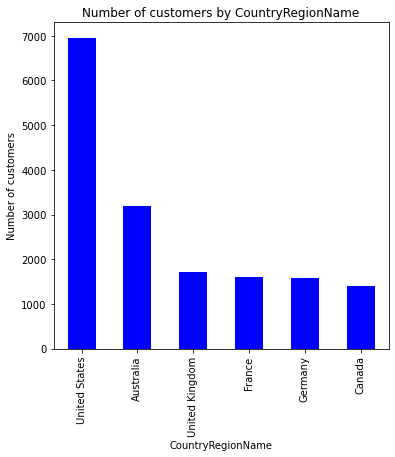

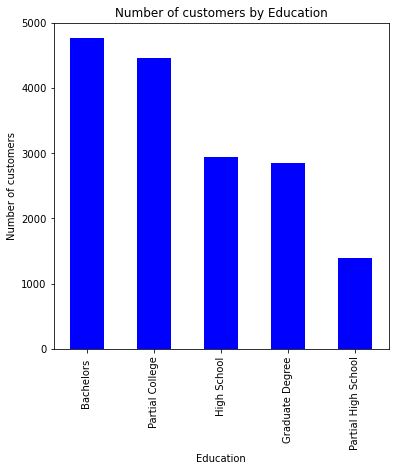

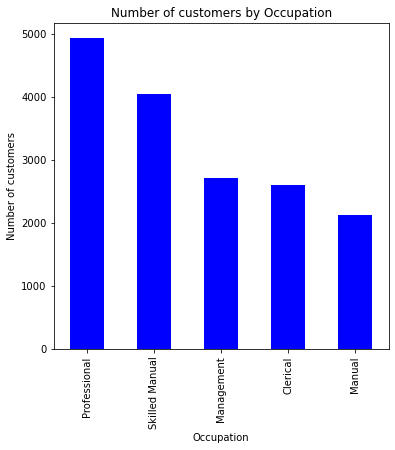

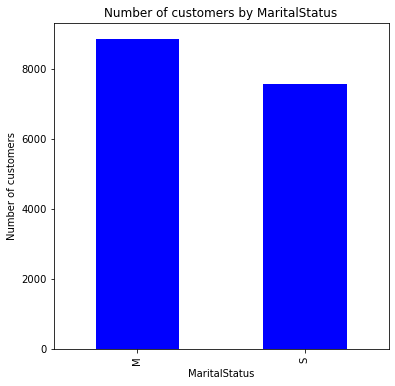

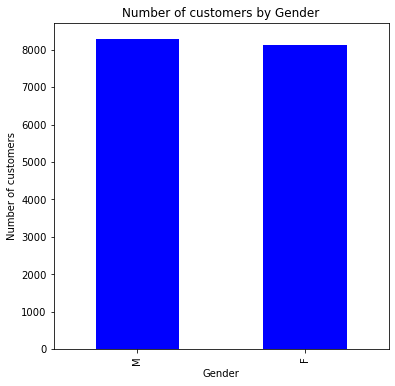

In [51]:
def plot_bars(cust_report, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = cust_report[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of customers by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers')# Set text for y axis
        plt.show()

plot_cols = ['CountryRegionName','Education','Occupation','MaritalStatus','Gender']
plot_bars(cust_report, plot_cols)    

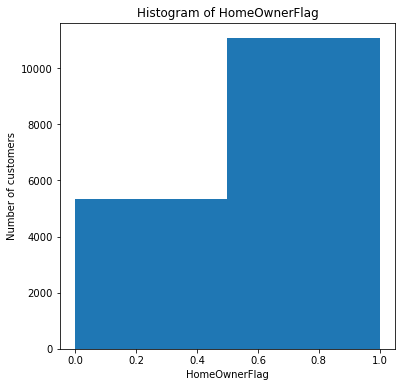

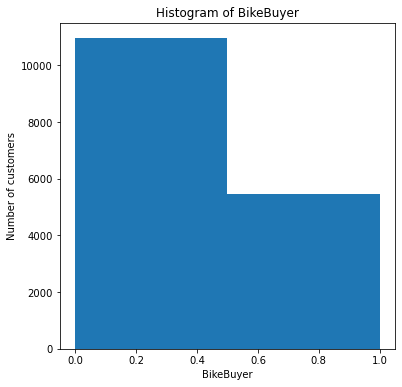

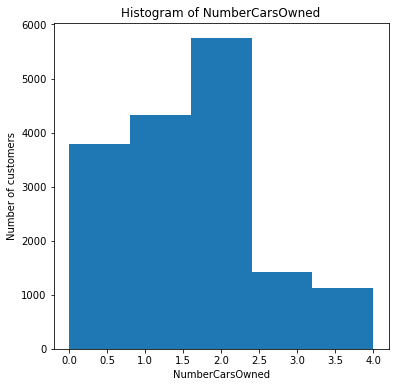

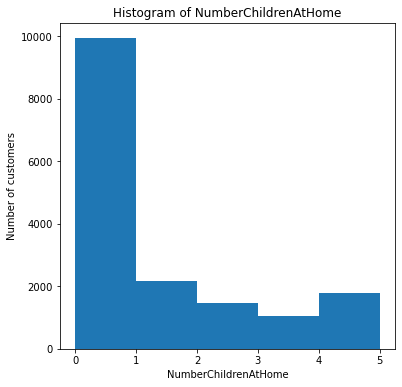

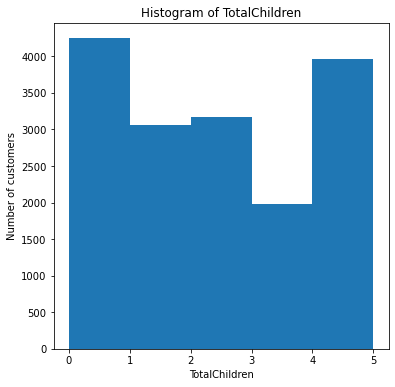

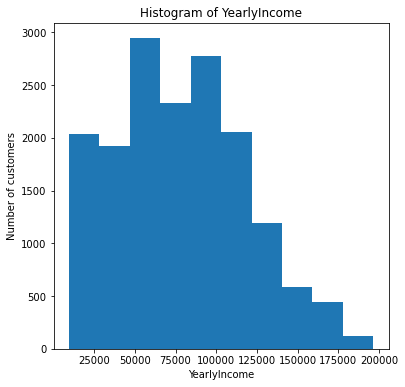

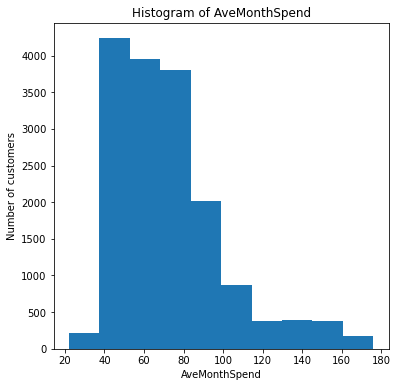

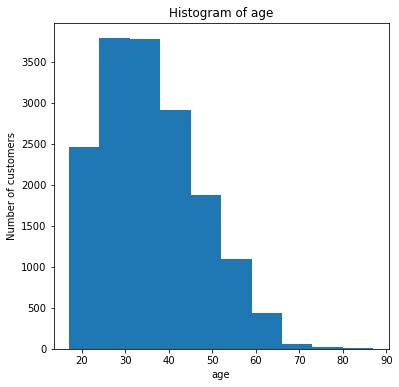

In [52]:
def plot_histogram(cust_report, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        cust_report[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers')# Set text for y axis
        plt.show()
        
num_cols1 = ['HomeOwnerFlag','BikeBuyer']   
num_cols2 = ['NumberCarsOwned','NumberChildrenAtHome','TotalChildren']
num_cols3 = ['YearlyIncome','AveMonthSpend','age']
plot_histogram(cust_report, num_cols1,2)
plot_histogram(cust_report, num_cols2,5)
plot_histogram(cust_report, num_cols3)

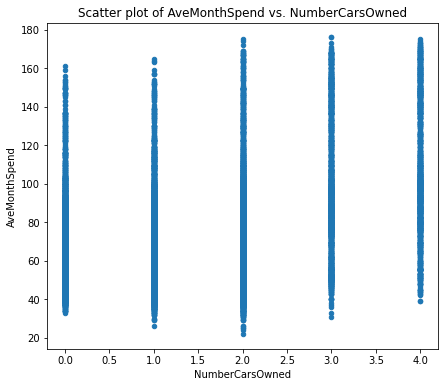

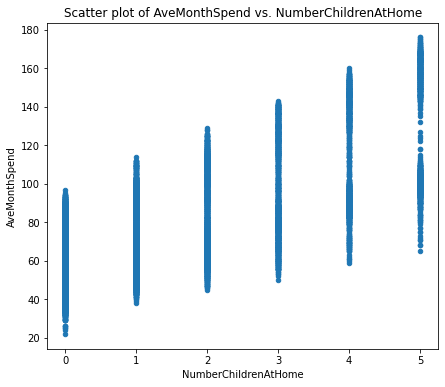

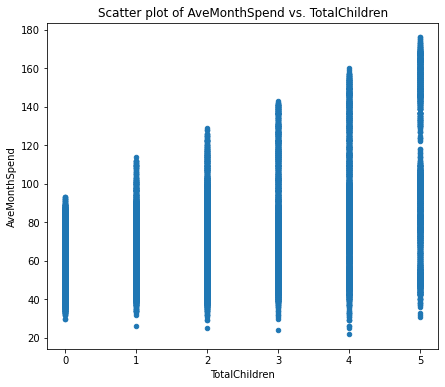

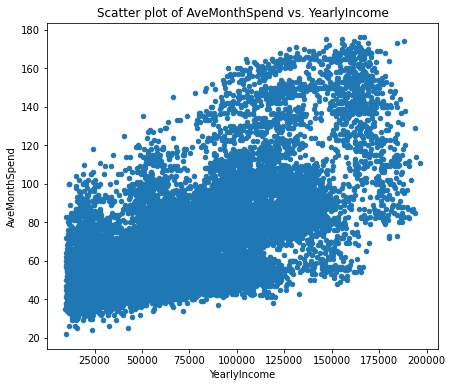

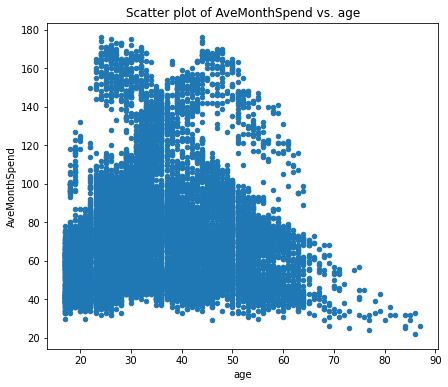

In [53]:
def plot_scatter(cust_report, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        cust_report.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

num_cols = ['NumberCarsOwned','NumberChildrenAtHome','TotalChildren','YearlyIncome','age']
plot_scatter(cust_report, num_cols)        

The scatter plots clearly reveal that there is over-plotting. 

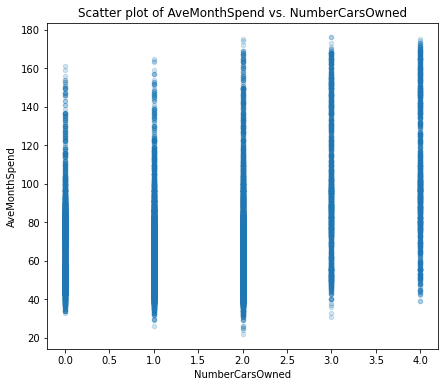

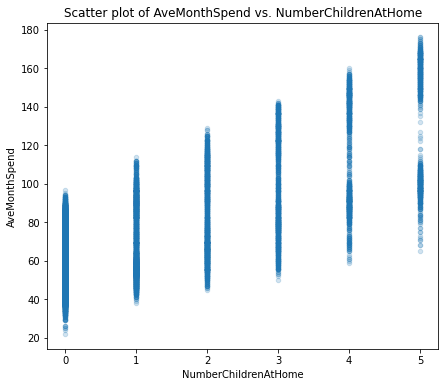

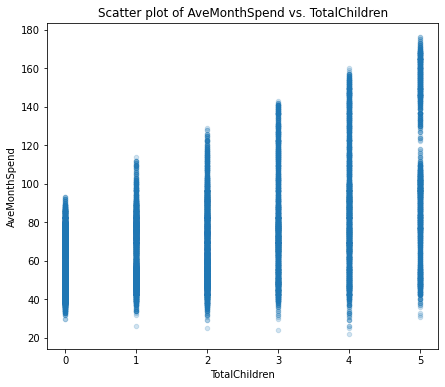

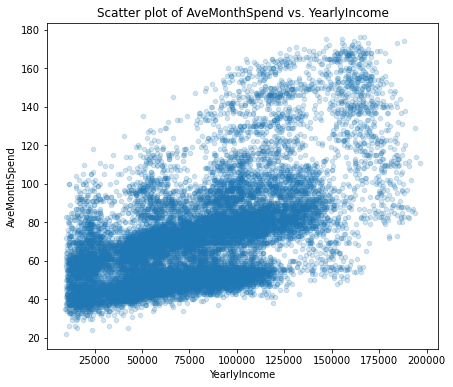

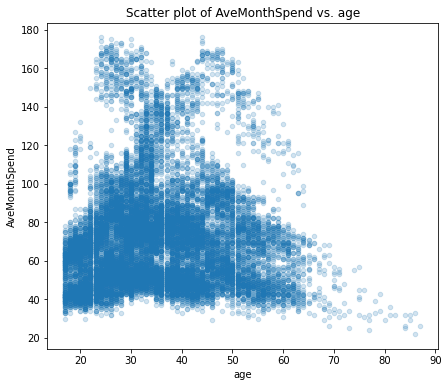

In [54]:
def plot_scatter_t(cust_report, cols, col_y = 'AveMonthSpend', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        cust_report.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

plot_scatter_t(cust_report, num_cols, alpha = 0.2)        

Thus it is evident that transparency doesn't help the case.

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


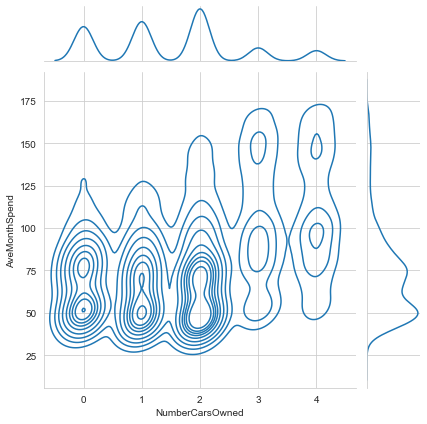

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


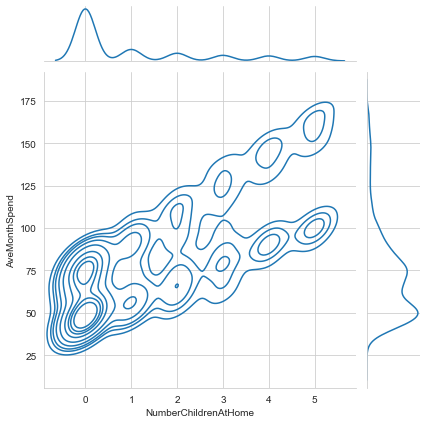

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


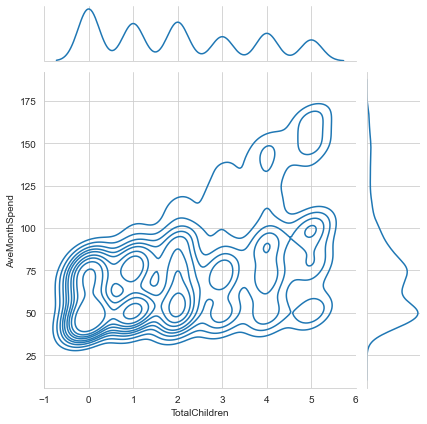

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


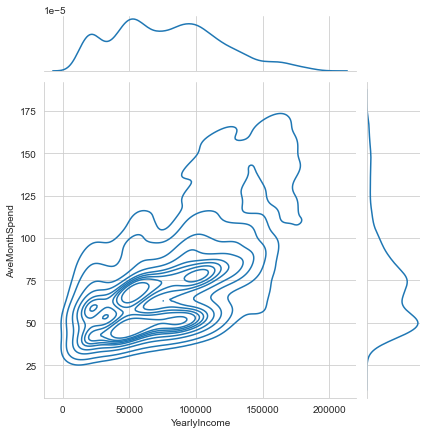

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


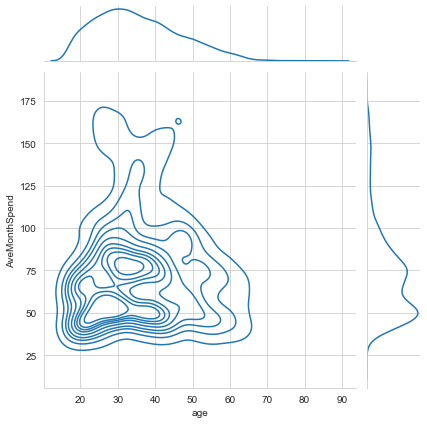

In [55]:
def plot_desity_2d(cust_report, cols, col_y = 'AveMonthSpend', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=cust_report, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_desity_2d(cust_report, num_cols)   

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


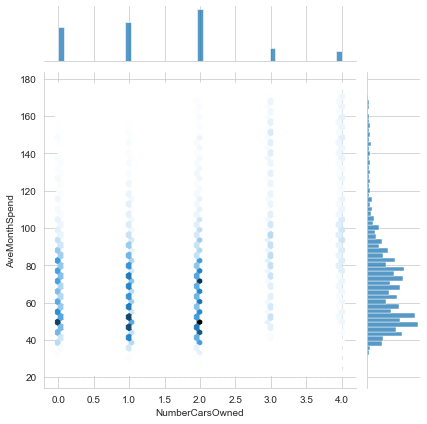

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


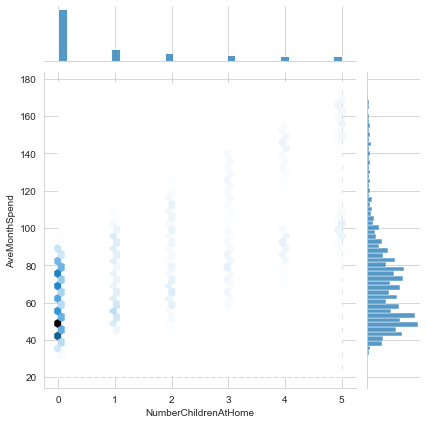

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


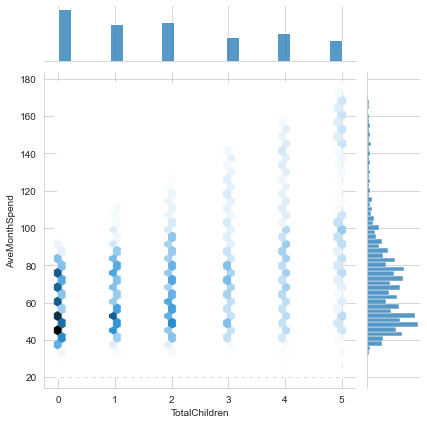

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


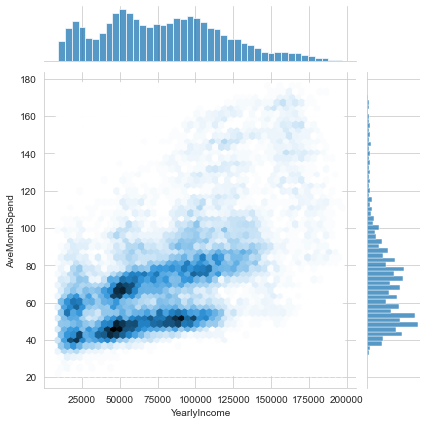

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


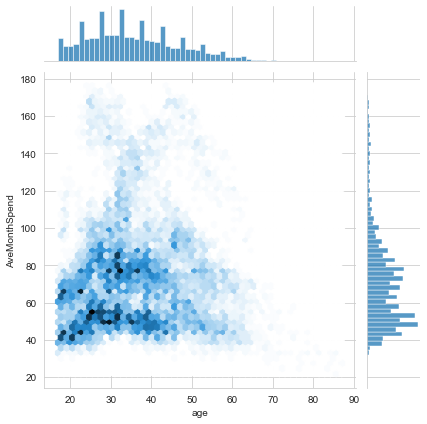

In [56]:
plot_desity_2d(cust_report, num_cols, kind = 'hex')

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


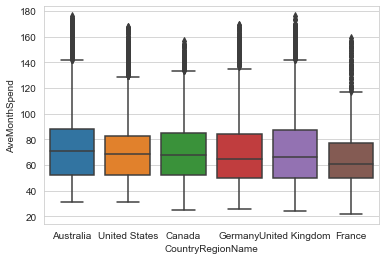

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


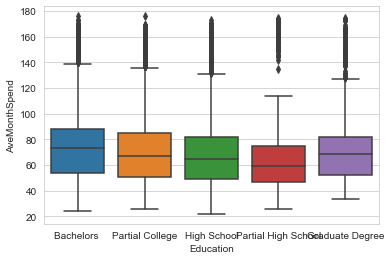

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


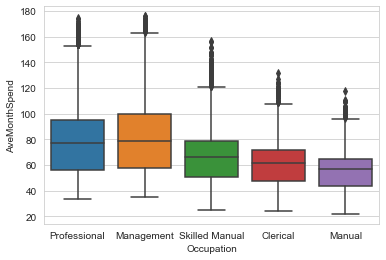

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


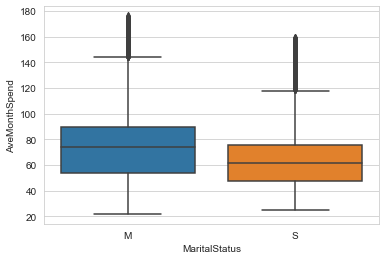

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


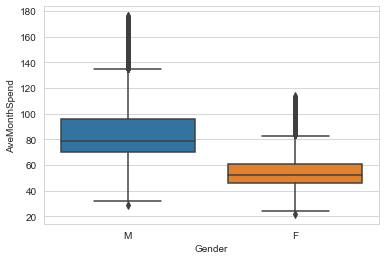

In [57]:
def plot_box(cust_report, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=cust_report)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['CountryRegionName','Education','Occupation','MaritalStatus','Gender']
plot_box(cust_report, cat_cols)    

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


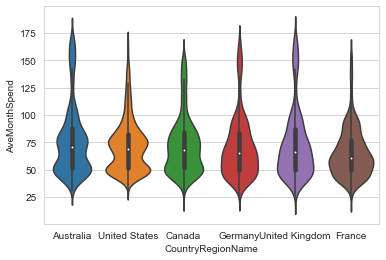

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


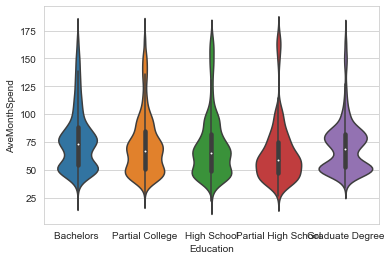

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


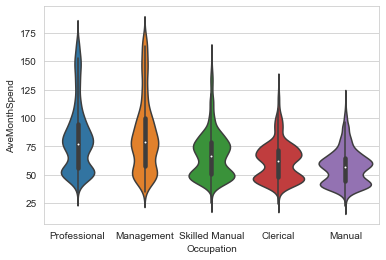

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


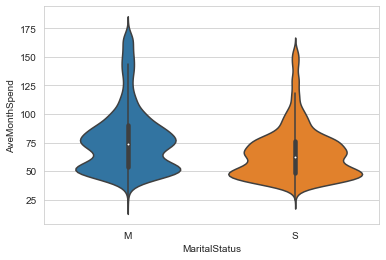

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


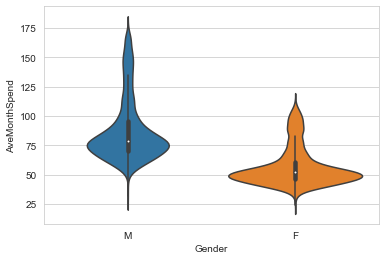

In [58]:
def plot_violin(cust_report, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=cust_report)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin(cust_report, cat_cols)   

From this, it is clear that AveMonthSpend is gender-dependent. 

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


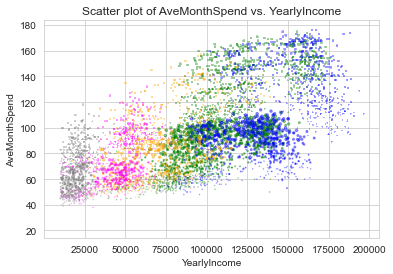

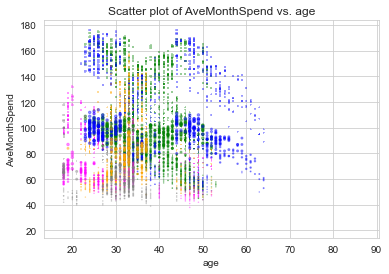

In [59]:
def plot_scatter_shape_size_col(cust_report, cols, shape_col = 'Gender', size_col = 'NumberChildrenAtHome',
                            size_mul = 0.25, color_col = 'Occupation', col_y = 'AveMonthSpend', alpha = 0.4):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    colors = ['green', 'blue', 'orange', 'magenta', 'gray',''] # specify distinctive colors
    unique_cats = cust_report[shape_col].unique()
    unique_colors = cust_report[color_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            for j, color in enumerate(unique_colors):
                temp = cust_report[(cust_report[shape_col] == cat) & (cust_report[color_col] == color)]
                sns.regplot(col, col_y, data=temp, marker = shapes[i],
                            scatter_kws={"alpha":alpha, "s":size_mul*temp[size_col]**2}, 
                            label = (cat + ' and ' + color), fit_reg = False, color = colors[j])
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

num_cols = ['YearlyIncome','age']        
plot_scatter_shape_size_col(cust_report, num_cols) 

As yearly income and occupation are highly related, it is enough to consider only one of them.

In [60]:
cust_report.dtypes

CustomerID                       int64
Title                           object
FirstName                       object
MiddleName                      object
LastName                        object
Suffix                          object
AddressLine1                    object
AddressLine2                    object
City                            object
StateProvinceName               object
CountryRegionName               object
PostalCode                      object
PhoneNumber                     object
BirthDate                       object
Education                       object
Occupation                      object
Gender                          object
MaritalStatus                   object
HomeOwnerFlag                    int64
NumberCarsOwned                  int64
NumberChildrenAtHome             int64
TotalChildren                    int64
YearlyIncome                     int64
AveMonthSpend                    int64
BikeBuyer                        int64
dob                     d

In [95]:
print(cust_report['Education'].unique())
Features = cust_report['Education']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['Bachelors ' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
[0 0 0 ... 0 2 2]


In [96]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [97]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['Gender','MaritalStatus']

for col in categorical_columns:
    temp = encode_string(cust_report[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])    

(16421, 9)
[[1. 0. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1.]]


In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler = MinMaxScaler()
cust_report[["Scaledincome"]] = scaler.fit_transform(cust_report[["YearlyIncome"]])
cust_report[["ScaledAge"]] = scaler.fit_transform(cust_report[["age"]])
cust_report[["ScaledCars"]] = scaler.fit_transform(cust_report[["NumberCarsOwned"]])
cust_report[["ScaledChildatHome"]] = scaler.fit_transform(cust_report[["NumberChildrenAtHome"]])
cust_report[["ScaledChildren"]] = scaler.fit_transform(cust_report[["TotalChildren"]])

In [100]:
num_col=['Scaledincome','ScaledAge','ScaledCars','ScaledChildatHome','ScaledChildren']

for col in num_col:
    print(cust_report[col],'\n')

0        0.686872
1        0.490079
2        0.440910
3        0.412802
4        0.445327
           ...   
16514    0.492223
16515    0.198189
16516    0.660705
16517    0.120024
16518    0.266804
Name: Scaledincome, Length: 16421, dtype: float64 

0        0.200000
1        0.214286
2        0.214286
3        0.171429
4        0.171429
           ...   
16514    0.214286
16515    0.628571
16516    0.571429
16517    0.485714
16518    0.500000
Name: ScaledAge, Length: 16421, dtype: float64 

0        0.00
1        0.25
2        0.25
3        0.25
4        1.00
         ... 
16514    1.00
16515    0.50
16516    0.50
16517    0.50
16518    0.50
Name: ScaledCars, Length: 16421, dtype: float64 

0        0.0
1        0.6
2        0.6
3        0.0
4        1.0
        ... 
16514    1.0
16515    0.0
16516    0.0
16517    0.0
16518    0.0
Name: ScaledChildatHome, Length: 16421, dtype: float64 

0        0.4
1        0.6
2        0.6
3        0.0
4        1.0
        ... 
16514    1.0
16515   

In [101]:
Features = np.concatenate([Features, np.array(cust_report[["YearlyIncome","age","NumberCarsOwned","NumberChildrenAtHome","TotalChildren"]])], axis = 1)
Features[:2,:]

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.37947e+05,
        3.10000e+01, 0.00000e+00, 0.00000e+00, 2.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.01141e+05,
        3.20000e+01, 1.00000e+00, 3.00000e+00, 3.00000e+00]])

In [102]:
nr.seed(9988)
labels = np.array(cust_report['AveMonthSpend'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = len(cust_report)//5)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [104]:
scaler = preprocessing.StandardScaler().fit(x_train[:,9:])
x_train[:,9:] = scaler.transform(x_train[:,9:])
x_test[:,9:] = scaler.transform(x_test[:,9:])
print(x_train.shape)
x_train[:5,:]

(13137, 14)


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -1.35346796e+00,  1.91934702e+00, -4.38504692e-01,
        -6.54874178e-01, -4.07443740e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         7.07077452e-01, -2.15007321e-01,  1.31859036e+00,
         2.66549714e+00,  1.78378869e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        -5.17768748e-01,  2.27507275e+00, -1.31705222e+00,
        -6.54874178e-01, -5.95139489e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.

In [105]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [106]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 3.73946701e+11  3.73946701e+11  3.73946701e+11  3.73946701e+11
  3.73946701e+11 -4.31468342e+12 -4.31468342e+12  3.94073672e+12
  3.94073672e+12  8.53723418e+00 -1.76814405e+00 -7.64888898e-01
  1.62139495e+01  6.43532178e-01]


In [107]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)    

Mean Square Error      = 40.88293763214748
Root Mean Square Error = 6.393976668095331
Mean Absolute Error    = 4.914654309446991
Median Absolute Error  = 4.022153604106972
R^2                    = 0.9459562952491818
Adjusted R^2           = 0.9455081441348476


C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


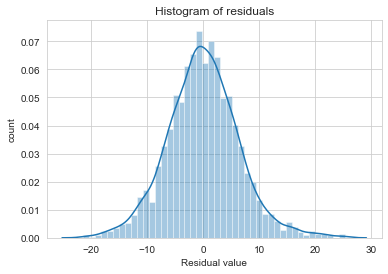

In [108]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

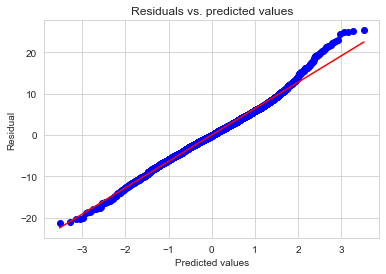

In [109]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)   

C:\Users\ekrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


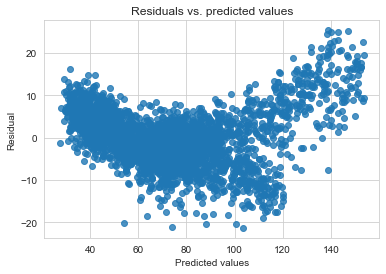

In [110]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 